<a href="https://colab.research.google.com/github/beyondstrong62/flower-Recognition/blob/main/Copy_of_Flower_Rec_checkpoint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from google.colab import drive


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

train_data_path = '/content/drive/MyDrive/CNN(flower)/training_set'
test_data_path = '/content/drive/MyDrive/CNN(flower)/test_set'
prediction_image_path = '/content/drive/MyDrive/CNN(flower)/Prediction/sunf.jpg'

# Verify the paths
if not os.path.exists(train_data_path):
    raise FileNotFoundError(f"Training data path does not exist: {train_data_path}")

if not os.path.exists(test_data_path):
    raise FileNotFoundError(f"Test data path does not exist: {test_data_path}")

if not os.path.exists(prediction_image_path):
    raise FileNotFoundError(f"Prediction image path does not exist: {prediction_image_path}")


In [ ]:
# Image data generators with data augmentation for training set and rescaling for test set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Creating data generators
training_set = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'  # Use categorical class mode for multi-class classification
)

test_set = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 4332 images belonging to 5 classes.
Found 129 images belonging to 5 classes.


In [ ]:
# Initializing the CNN
model = Sequential()

# Adding convolutional layers, pooling layers, and dense layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(training_set.class_indices), activation='softmax'))  # Adjust output layer to match the number of classes

# Compiling the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Training the model
history = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // 32,
    epochs=25,
    validation_data=test_set,
    validation_steps=test_set.samples // 32
)


Epoch 1/25
135/135 [==============================] - 1409s 10s/step - loss: 1.3424 - accuracy: 0.4158 - val_loss: 1.1374 - val_accuracy: 0.5234
Epoch 2/25
135/135 [==============================] - 24s 176ms/step - loss: 1.1410 - accuracy: 0.5456 - val_loss: 0.9394 - val_accuracy: 0.6484
Epoch 3/25
135/135 [==============================] - 24s 177ms/step - loss: 1.0531 - accuracy: 0.5930 - val_loss: 0.9804 - val_accuracy: 0.6094
Epoch 4/25
135/135 [==============================] - 24s 176ms/step - loss: 1.0029 - accuracy: 0.6072 - val_loss: 0.9602 - val_accuracy: 0.6406
Epoch 5/25
135/135 [==============================] - 24s 181ms/step - loss: 0.9371 - accuracy: 0.6407 - val_loss: 0.9111 - val_accuracy: 0.6406
Epoch 6/25
135/135 [==============================] - 24s 181ms/step - loss: 0.9043 - accuracy: 0.6567 - val_loss: 0.9889 - val_accuracy: 0.6250
Epoch 7/25
135/135 [==============================] - 24s 181ms/step - loss: 0.8740 - accuracy: 0.6635 - val_loss: 0.8955 - val_ac

In [ ]:
# Load and preprocess the image
test_image = image.load_img(prediction_image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255.0

# Predict the result
result = model.predict(test_image)
print(result)

# Mapping result to class labels
class_labels = list(training_set.class_indices.keys())
predicted_class = class_labels[np.argmax(result)]
print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 0s 286ms/step
[[3.9185845e-05 6.9259272e-06 8.6619210e-09 9.9986827e-01 8.5556050e-05]]
Predicted class: sunflower


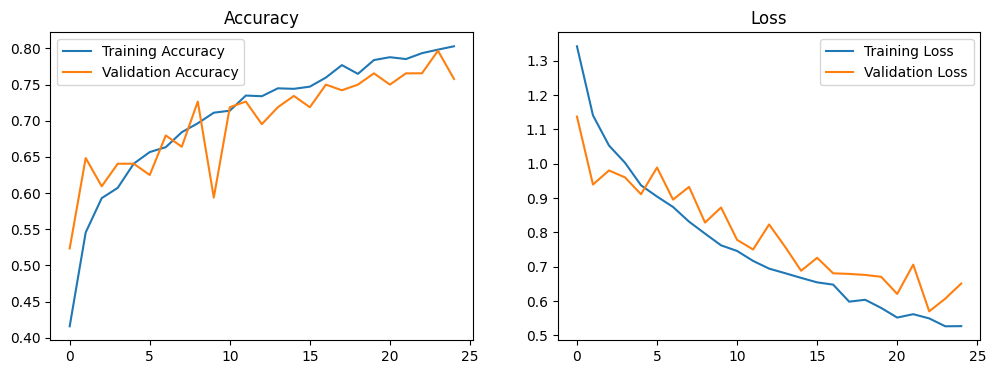

In [ ]:
# Visualizing the training process (if needed)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
